<a href="https://colab.research.google.com/github/SavannahY/Global-A.I.-Data-Science/blob/master/SDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SDG

##Load the data

Here I use google drive to load the data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here import neccessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The dataframe is loaded by pandas

In [3]:
path = 'gdrive/My Drive/SDG_Data_File_Daily.csv'
df = pd.read_csv(path)

Overview of the dataset

In [4]:
print(df.shape)

(1604138, 96)


The dataset has 1604128 rows and 96 columns. The first date is 2013-04-01. The last date is 2020-04-22.


In [5]:
df.head(1)

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
0,0,2013-04-01,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail(1)

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
1604137,1604137,2020-04-22,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01937,1.013147,0.360956,0.408976,0.403048,0.373011,-0.011969,0.107059,0.276274,0.190006,0.527436,-0.533966,-0.088535,0.077056,-0.089266,0.399164,...,0.159839,0.71511,0.683689,0.574723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 11 GICS sectors are 'Health Care' 'Industrials' 'Consumer Discretionary'
 'Information Technology' 'Financials' 'Consumer Staples' 'Utilities'
 'Materials' 'Real Estate' 'Energy' 'Communication Services'.

In [7]:
print(df['GICS Sector'].unique(), len(df['GICS Sector'].unique()))

['Health Care' 'Industrials' 'Consumer Discretionary'
 'Information Technology' 'Financials' 'Consumer Staples' 'Utilities'
 'Materials' 'Real Estate' 'Energy' 'Communication Services'] 11


In [8]:
df.describe()

,Unnamed: 0,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,STS_17,STS_Mean,LTS_1,LTS_2,LTS_3,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
count,1.604138e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06,1.266540e+06,1.302011e+06,1.445644e+06,1.420867e+06,1.058791e+06,1.233136e+06,1.336369e+06,1.484403e+06,1.430361e+06,1.451407e+06,1.481187e+06,1.352800e+06,1.241856e+06,1.215373e+06,1.255458e+06,1.471184e+06,1.220113e+06,1.501782e+06,1.150773e+06,1.191963e+06,1.382040e+06,...,1.148964e+06,1.407379e+06,1.112797e+06,1.449726e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06,387681.000000,422694.000000,805362.000000,648846.000000,229394.000000,344897.000000,503870.000000,911957.000000,685784.000000,720027.000000,896346.000000,516385.000000,365288.000000,318833.000000,393312.000000,821992.000000,352580.000000,1.015324e+06
mean,8.020685e+05,-0.357852,0.062671,0.072872,0.719752,-1.380533,0.197805,0.108781,0.496932,-0.080738,0.107780,0.170012,0.010821,-0.443993,-0.159447,-0.398468,-0.182030,0.052788,2.831794e-01,-9.835792e-02,1.525737e-01,1.616909e-01,5.706206e-01,-5.394000e-01,2.861254e-01,2.055383e-01,4.735408e-01,7.855393e-02,1.717742e-01,2.021815e-01,1.253681e-01,-1.410265e-01,9.690566e-02,-1.021641e-01,-3.074522e-03,1.872461e-01,1.738749e-01,-1.951641e-01,1.931800e-01,2.166288e-01,...,-2.065652e-01,-1.967385e-02,2.295757e-01,2.059033e-01,1.830937,1.825867,1.947087,1.957604,2.033796,1.632097,1.649796,1.805746,1.921903,1.907206,1.937824,1.771611,1.819514,1.838424,1.828259,1.903333,1.771369,1.741477e+00,16.020963,13.972096,37.111761,28.377883,22.379870,9.318272,14.489539,36.883895,32.092309,40.255782,47.675005,16.328195,15.170356,11.717297,15.620668,46.400214,12.311924,1.691596e+01
std,4.630749e+05,2.102821,2.070824,2.068438,2.135078,2.658081,1.948228,1.796993,1.757527,2.071301,1.987096,1.983880,2.002093,2.153003,2.234790,2.156520,2.024761,2.146515,1.857531e+00,9.875986e-01,9.556521e-01,9.661291e-01,9.506840e-01,1.003356e+00,9.900551e-01,9.969123e-01,9.914281e-01,9.972469e-01,9.868459e-01,9.730402e-01,9.845476e-01,9.638124e-01,9.845512e-01,9.593857e-01,9.891114e-01,9.636989e-01,9.626420e-01,9.934300e-01,9.437956e-01,9.974397e-01,...,9.558929e-01,1.041336e+00,9.491697e-01,9.682403e-01,1.006029,1.007001,1.150142,1.080429,1.144429,0.954200,0.915378,1.009010,1.063366,1.035522,1.117093,0.978430,1.004856,1.020241,1.011565,1.122822,0.990017,7.414263e-01,75.531211,63.640417,251.011407,179.137799,117.444728,29.605740,49.687493,221.383753,195.607193,258.107416,335.831275,69.882129,74.771148,51.224955,78.833347,317.423683,50.670370,1.128878e+02
min,0.000000e+00,-21.967213,-21.967213,-26.383565,-26.383565,-24.137931,-16.409861,-16.586151,-26.383565,-19.975031,-17.957505,-26.383565,-20.772239,-17.391304,-18.604651,-17.391304,-26.383565,-18.835616,-2.638357e+01,-8.262921e+00,-8.081865e+00,-9.468227e+00,-8.237315e+00,-8.358393e+00,-9.178661e+00,-9.617961e+00,-1.107147e

In [9]:
grouped_df = df.groupby(['GICS Sector','Ticker'])

In [10]:
grouped_df.head()

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
0,0,2013-04-01,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-04-02,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-04-03,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-04-04,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-04-05,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601559,1601559,2013-04-01,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601560,1601560,2013-04-02,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601561,1601561,2013-04-03,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
grouped_df['SDG_News_Volume_Mean'].describe().unstack()

count          ...         max           
Ticker                       A     AAL  ...        ZION        ZTS
GICS Sector                             ...                       
Communication Services     NaN     NaN  ...         NaN        NaN
Consumer Discretionary     NaN     NaN  ...         NaN        NaN
Consumer Staples           NaN     NaN  ...         NaN        NaN
Energy                     NaN     NaN  ...         NaN        NaN
Financials                 NaN     NaN  ...  283.529412        NaN
Health Care             2058.0     NaN  ...         NaN  32.142857
Industrials                NaN  2572.0  ...         NaN        NaN
Information Technology     NaN     NaN  ...         NaN        NaN
Materials                  NaN     NaN  ...         NaN        NaN
Real Estate                NaN     NaN  ...         NaN        NaN
Utilities                  NaN     NaN  ...         NaN        NaN

[11 rows x 4976 columns]

In [12]:
grouped_df['SDG_Mean'].mean().reset_index()

,GICS Sector,Ticker,SDG_Mean
0,Communication Services,ATVI,-0.296826
1,Communication Services,CBS,0.838991
2,Communication Services,CHTR,-0.141742
3,Communication Services,CMCSA,-0.441688
4,Communication Services,CTL,0.380777
...,...,...,...
617,Utilities,SO,0.131370
618,Utilities,SRE,0.359084
619,Utilities,UGI,0.417344
620,Utilities,WEC,1.109142


Measures of Variability in Python

Pandas Standard deviation


In [13]:
grouped_df['SDG_News_Volume_Mean'].std().reset_index()


,GICS Sector,Ticker,SDG_News_Volume_Mean
0,Communication Services,ATVI,3.813528
1,Communication Services,CBS,1.915781
2,Communication Services,CHTR,9.544643
3,Communication Services,CMCSA,29.892311
4,Communication Services,CTL,2.974711
...,...,...,...
617,Utilities,SO,15.698301
618,Utilities,SRE,4.671249
619,Utilities,UGI,1.107565
620,Utilities,WEC,0.650793


Interquartile Range in Pandas


In [14]:
grouped_df['SDG_News_Volume_Mean'].quantile([.25, .5, .75]).unstack()


0.25       0.50       0.75
GICS Sector            Ticker                                
Communication Services ATVI    2.000000   3.181818   4.923077
                       CBS     1.000000   1.250000   2.000000
                       CHTR    1.916667   3.111111   5.000000
                       CMCSA   8.953125  16.705882  29.880515
                       CTL     1.250000   2.000000   3.000000
...                                 ...        ...        ...
Utilities              SO      3.384615   5.937500  10.081731
                       SRE     1.333333   2.333333   4.000000
                       UGI     1.000000   1.000000   1.555556
                       WEC     1.000000   1.000000   1.237500
                       XEL     2.857143   4.625000   7.266667

[622 rows x 3 columns]

Here CMCSA(Comcast) and SO(Southern Company)and has a relatively higher news volumn.

Pandas Variance

In [15]:
grouped_df['SDG_News_Volume_Mean'].var().reset_index()


,GICS Sector,Ticker,SDG_News_Volume_Mean
0,Communication Services,ATVI,14.542995
1,Communication Services,CBS,3.670216
2,Communication Services,CHTR,91.100217
3,Communication Services,CMCSA,893.550228
4,Communication Services,CTL,8.848904
...,...,...,...
617,Utilities,SO,246.436666
618,Utilities,SRE,21.820570
619,Utilities,UGI,1.226701
620,Utilities,WEC,0.423531


In [16]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Ticker', 'ISIN', 'Company_Name',
       'GICS Sector', 'SDG_1', 'SDG_2', 'SDG_3', 'SDG_4', 'SDG_5', 'SDG_6',
       'SDG_7', 'SDG_8', 'SDG_9', 'SDG_10', 'SDG_11', 'SDG_12', 'SDG_13',
       'SDG_14', 'SDG_15', 'SDG_16', 'SDG_17', 'SDG_Mean', 'STS_1', 'STS_2',
       'STS_3', 'STS_4', 'STS_5', 'STS_6', 'STS_7', 'STS_8', 'STS_9', 'STS_10',
       'STS_11', 'STS_12', 'STS_13', 'STS_14', 'STS_15', 'STS_16', 'STS_17',
       'STS_Mean', 'LTS_1', 'LTS_2', 'LTS_3', 'LTS_4', 'LTS_5', 'LTS_6',
       'LTS_7', 'LTS_8', 'LTS_9', 'LTS_10', 'LTS_11', 'LTS_12', 'LTS_13',
       'LTS_14', 'LTS_15', 'LTS_16', 'LTS_17', 'LTS_Mean', 'SDG_1_STD',
       'SDG_2_STD', 'SDG_3_STD', 'SDG_4_STD', 'SDG_5_STD', 'SDG_6_STD',
       'SDG_7_STD', 'SDG_8_STD', 'SDG_9_STD', 'SDG_10_STD', 'SDG_11_STD',
       'SDG_12_STD', 'SDG_13_STD', 'SDG_14_STD', 'SDG_15_STD', 'SDG_16_STD',
       'SDG_17_STD', 'SDG_STD_Mean', 'SDG_1_News_Volume', 'SDG_2_News_Volume',
       'SDG_3_News_Volume',

In [17]:
grouped_df.tail()

,Unnamed: 0,Timestamp,Ticker,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
2574,2574,2020-04-18,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,0.691222,0.691222,NaN,NaN,NaN,NaN,NaN,NaN,0.691222,NaN,NaN,NaN,NaN,-0.589391,NaN,0.371069,0.23893,0.705084,-0.690485,0.045979,1.008706,1.301666,-0.201022,0.084781,0.625076,-0.313566,-0.692083,0.199022,1.143061,-0.184751,1.149630,-0.382145,...,0.077051,0.059655,0.927694,0.604545,NaN,NaN,1.109895,1.109895,NaN,NaN,NaN,NaN,NaN,NaN,1.109895,NaN,NaN,NaN,NaN,2.000000,NaN,1.332421,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,2.5
2575,2575,2020-04-19,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23893,0.705084,-0.690485,0.045979,1.008706,1.301666,-0.201022,0.084781,0.625076,-0.313566,-0.692083,0.199022,1.143061,-0.184751,1.149630,-0.382145,...,0.077051,0.059655,0.927694,0.604545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2576,2576,2020-04-20,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,0.717707,NaN,NaN,NaN,NaN,0.613497,NaN,-0.164581,0.821918,NaN,NaN,NaN,NaN,NaN,NaN,0.497135,0.23893,0.705084,-0.229388,0.045979,1.008706,1.301666,-0.201022,-0.084252,0.625076,-0.290777,-0.381270,0.199022,1.143061,-0.184751,1.149630,-0.382145,...,0.077051,0.059655,0.927694,0.603431,NaN,NaN,0.147376,NaN,NaN,NaN,NaN,2.000000,NaN,0.000745,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.037030,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5
2577,2577,2020-04-21,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,0.578771,0.540541,NaN,NaN,NaN,0.818866,NaN,NaN,0.245902,NaN,NaN,NaN,NaN,2.315371,NaN,0.899890,0.23893,0.705084,0.098120,0.131219,1.008706,1.301666,-0.201022,0.136199,0.625076,-0.290777,-0.155068,0.199022,1.143061,-0.184751,1.149630,0.048467,...,0.077051,0.110015,0.927694,0.606381,NaN,NaN,1.864470,2.000000,NaN,NaN,NaN,0.209626,NaN,NaN,2.888589,NaN,NaN,NaN,NaN,1.790247,NaN,1.750586,NaN,NaN,6.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.2
2578,2578,2020-04-22,A,US00846U1016,agilent technologies inc,Health Care,NaN,NaN,-2.600473,3.422983,NaN,NaN,NaN,NaN,NaN,-0.236247,1.415164,NaN,NaN,NaN,NaN,3.422983,NaN,1.084882,0.23893,0.705084,-0.091389,1.245496,1.008706,1.301666,-0.201022,0.136199,0.625076,-0.230140,0.104697,0.199022,1.143061,-0.184751,1.149630,1.219432,...,0.077051,0.275072,0.927694,0.625676,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,3.477644,NaN,NaN,NaN,NaN,0.000000,NaN,1.495529,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604133,1604133,2020-04-18,ZTS,US98978V1035,zoetis inc,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01937,1.013147,0.590885,0.408976,0.403048,0.373011,-0.011969,0.203875,0.276274

There are 622 companies in this dataset.

In [18]:
df_ticker = df.groupby(["Ticker"])

In [19]:
df_ticker.count()

,Unnamed: 0,Timestamp,ISIN,Company_Name,GICS Sector,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean,STS_1,STS_2,STS_3,STS_4,STS_5,STS_6,STS_7,STS_8,STS_9,STS_10,STS_11,STS_12,STS_13,STS_14,STS_15,STS_16,STS_17,...,LTS_15,LTS_16,LTS_17,LTS_Mean,SDG_1_STD,SDG_2_STD,SDG_3_STD,SDG_4_STD,SDG_5_STD,SDG_6_STD,SDG_7_STD,SDG_8_STD,SDG_9_STD,SDG_10_STD,SDG_11_STD,SDG_12_STD,SDG_13_STD,SDG_14_STD,SDG_15_STD,SDG_16_STD,SDG_17_STD,SDG_STD_Mean,SDG_1_News_Volume,SDG_2_News_Volume,SDG_3_News_Volume,SDG_4_News_Volume,SDG_5_News_Volume,SDG_6_News_Volume,SDG_7_News_Volume,SDG_8_News_Volume,SDG_9_News_Volume,SDG_10_News_Volume,SDG_11_News_Volume,SDG_12_News_Volume,SDG_13_News_Volume,SDG_14_News_Volume,SDG_15_News_Volume,SDG_16_News_Volume,SDG_17_News_Volume,SDG_News_Volume_Mean
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,2579,2579,2579,2579,2579,384,658,1867,1600,75,324,603,1707,1098,1138,1922,683,397,212,367,1520,363,2058,2383,2425,2530,2502,1816,2226,2434,2502,2456,2507,2508,2424,2401,2124,2353,2501,2130,...,2321,2464,1982,2484,384,658,1867,1600,75,324,603,1707,1098,1138,1922,683,397,212,367,1520,363,2058,384,658,1867,1600,75,324,603,1707,1098,1138,1922,683,397,212,367,1520,363,2058
AAL,2579,2579,2579,2579,2579,2290,2306,2529,2508,2123,1701,2246,2559,2555,2572,2566,2495,2304,2202,2337,2568,2291,2572,2563,2564,2569,2568,2552,2500,2546,2573,2572,2573,2572,2568,2564,2532,2564,2573,2564,...,2540,2565,2526,2565,2290,2306,2529,2508,2123,1701,2246,2559,2555,2572,2566,2495,2304,2202,2337,2568,2291,2572,2290,2306,2529,2508,2123,1701,2246,2559,2555,2572,2566,2495,2304,2202,2337,2568,2291,2572
AAP,2579,2579,2579,2579,2579,244,302,1271,957,80,138,407,1534,1191,912,1522,396,302,182,321,1318,201,1829,2345,2341,2475,2490,1841,2008,2369,2491,2475,2450,2495,2380,2345,2319,2352,2485,2101,...,2084,2415,1878,2447,244,302,1271,957,80,138,407,1534,1191,912,1522,396,302,182,321,1318,201,1829,244,302,1271,957,80,138,407,1534,1191,912,1522,396,302,182,321,1318,201,1829
AAPL,2579,2579,2579,2579,2579,2233,2181,2536,2534,1816,1687,2309,2570,2541,2569,2568,2486,2048,1760,2072,2566,2278,2573,2568,2565,2573,2573,2548,2556,2569,2573,2573,2572,2573,2570,2556,2550,2556,2573,2562,...,2530,2564,2534,2565,2233,2181,2536,2534,1816,1687,2309,2570,2541,2569,2568,2486,2048,1760,2072,2566,2278,2573,2233,2181,2536,2534,1816,1687,2309,2570,2541,2569,2568,2486,2048,1760,2072,2566,2278,2573
ABBV,2579,2579,2579,2579,2579,408,427,2208,1484,163,235,731,2093,1421,1638,2203,1202,384,267,435,1971,762,2251,2128,2096,2556,2507,2109,2047,2348,2547,2505,2502,2556,2463,2105,2437,2105,2542,2339,...,2052,2498,2168,2521,408,427,2208,1484,163,235,731,2093,1421,1638,2203,1202,384,267,435,1971,762,2251,408,427,2208,1484,163,235,731,2093,1421,1638,2203,1202,384,267,435,1971,762,2251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z,2579,2579,2579,2579,2579,496,330,1127,937,118,125,381,1765,1027,986,1419,751,255,296,294,1270,348,1803,2413,2404,2439,2450,1969,1981,2163,2528,2459,2451,2479,2395,2169,1941,2169,2453,2134,...,1914,2428,2019,2471,496,330,1127,937,118,125,381,1765,1027,986,1419,751,255,296,294,1270,348,1803,496,330,1127,937,118,125,381,1765,1027,986,1419,751,255,296,294,1270,348,1803
ZAYO,2579,2579,2579,2579,2579,69,93,653,488,26,61,127,847,494,419,853,315,66,84,75,734,85,1148,2031,2169,2407,2465,1899,2018,2030,2465,2429,2345,2458,2429,2183,1931,2183,2458,1875,...,1735,2395,1622,2395,69,93,653,488,26,61,127,847,494,419,853,315,66,84,75,734,85,1148,69,93,653,488,26,61,127,847,494,419,853,315,66,84,75,734,85,1148
ZBH,2579,2579,2579,2579,2579,92,123,1370,499,31,66,192,1198,477,476,1391,323,84,104,108,808,123,14

## Data Proprocessing

In [20]:
print('Unique values in `Ticker` column:', list(df.Ticker.unique()))

Unique values in `Ticker` column: ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFG', 'AFL', 'AGCO', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALKS', 'ALL', 'ALLE', 'ALLY', 'ALNY', 'ALV', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMTD', 'AMZN', 'AN', 'ANDV', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'AR', 'ARMK', 'ARW', 'ASH', 'ATH', 'ATO', 'ATVI', 'AVB', 'AVP', 'AVT', 'AVY', 'AWK', 'AXP', 'AXS', 'AXTA', 'AYI', 'AZO', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BDX', 'BEN', 'BF/B', 'BG', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL', 'BMRN', 'BMY', 'BR', 'BRK/B', 'BRX', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CBS', 'CC', 'CCI', 'CCK', 'CCL', 'CDK', 'CDNS', 'CDW', 'CE', 'CELG', 'CERN', 'CF', 'CFG', 'CGNX', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CIT', 'CL', 'CLB', 'CLR', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI',

In [21]:
#How many missing data points do we have?

# get the number of missing data points per column

missing_values_count = df.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[6:6+17]

SDG_1     1216457
SDG_2     1181444
SDG_3      798776
SDG_4      955292
SDG_5     1374744
SDG_6     1259241
SDG_7     1100268
SDG_8      692181
SDG_9      918354
SDG_10     884111
SDG_11     707792
SDG_12    1087753
SDG_13    1238850
SDG_14    1285305
SDG_15    1210826
SDG_16     782146
SDG_17    1251558
dtype: int64

We have 1604138 in total and more than half of the columns are blank.
 



In [22]:
# Number of companies:
len(list(df.Ticker.unique()))

622

In [23]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

43.28540533399662


In [24]:
# how many total missing values do we have?
total_cells = 17*1604138
total_missing = missing_values_count[6:6+17].sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

65.80443827152028



removing columns we do not need,
check missing values
CMCSA(Comcast) and SO(Southern Company)

A value is missing means it doesn't exist here. It doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. 

In [25]:
# remove all the rows that contain a missing value
# 102073 rows × 96 columns

withoutNa_df = df.dropna()

In [26]:
# This doesn't work
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)

# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 96 

Columns with na's dropped: 5


When we only focus on the SDG 1 - SDG 17 columns of the original dataset

In [27]:
## get a small subset of the dataset
SDG_data = df.loc[:, 'SDG_1':'SDG_17'].head()
SDG_data

,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Indexing with Time Series Data

Here we use without NaN dataset

In [28]:
CMCSA_data = withoutNa_df[withoutNa_df.Ticker.isin(['CMCSA'])]
print(CMCSA_data)

        Unnamed: 0   Timestamp  ... SDG_17_News_Volume SDG_News_Volume_Mean
335383      335383  2013-07-23  ...                5.0             5.588235
335412      335412  2013-08-21  ...                2.0            13.117647
335441      335441  2013-09-19  ...                1.0             4.117647
335469      335469  2013-10-17  ...                5.0             7.411765
335579      335579  2014-02-04  ...                1.0             4.882353
...            ...         ...  ...                ...                  ...
337832      337832  2020-04-06  ...                5.0            17.176471
337838      337838  2020-04-12  ...                1.0             7.176471
337840      337840  2020-04-14  ...               10.0            24.588235
337843      337843  2020-04-17  ...                3.0            15.294118
337846      337846  2020-04-20  ...                2.0            12.117647

[1140 rows x 96 columns]


In [29]:
CMCSA_df = CMCSA_data[ ['Timestamp'] + list(CMCSA_data.loc[:,'SDG_1':'SDG_Mean']) ]


In [30]:
# dtype('O'), "O" is the code for "object"
CMCSA_df['Timestamp'].dtype

dtype('O')

Convert our date columns to datetime¶


In [31]:
# create a new column, date_parsed, with the parsed dates
CMCSA_df['Timestamp'] = pd.to_datetime(CMCSA_df['Timestamp'])
CMCSA_df.set_index('Timestamp',inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
CMCSA_df.head

<bound method NDFrame.head of                SDG_1     SDG_2     SDG_3  ...    SDG_16    SDG_17  SDG_Mean
Timestamp                                 ...                              
2013-07-23 -0.266904 -0.266904  1.565868  ... -0.350823 -0.875618 -0.130863
2013-08-21 -3.298040 -1.390465 -1.121808  ... -0.142483 -1.989590 -1.967195
2013-09-19 -0.212993 -0.212993  4.112337  ... -1.759727 -0.212993  1.080744
2013-10-17  3.211009  2.610890  2.215722  ...  1.431518  2.179869  1.451944
2014-02-04  1.315789  1.155116  0.842156  ... -0.844424  1.155116  0.296486
...              ...       ...       ...  ...       ...       ...       ...
2020-04-06 -0.772729  0.111607 -0.515292  ... -1.117755  0.167149 -0.478724
2020-04-12 -0.615665  0.442999  0.233663  ... -0.443085  1.984446  0.584394
2020-04-14 -0.620649  0.593565 -0.371695  ... -0.480594  1.787150 -0.955745
2020-04-17 -0.944887  0.771997 -0.112605  ... -0.700838 -1.312455 -0.650523
2020-04-20 -1.240542 -0.769242  0.988095  ... -1.090842 -0

### Plot the data

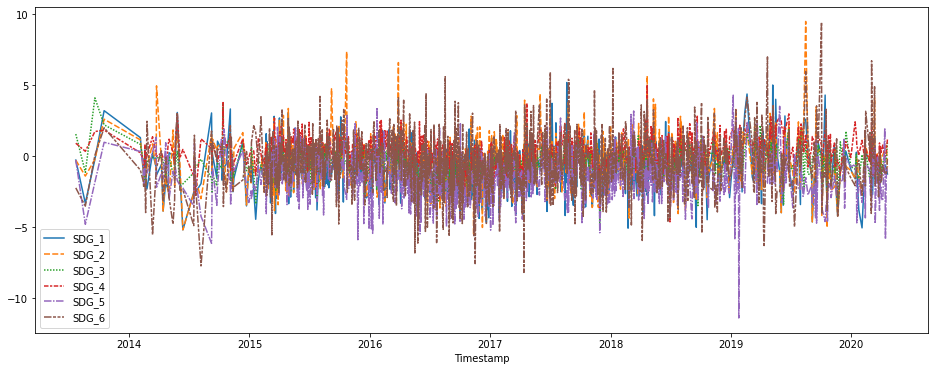

In [33]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how SDGs evolved over time 
sns.lineplot(data=CMCSA_df.loc[:,'SDG_1':'SDG_6'])

Text(0.5, 0, 'Date')

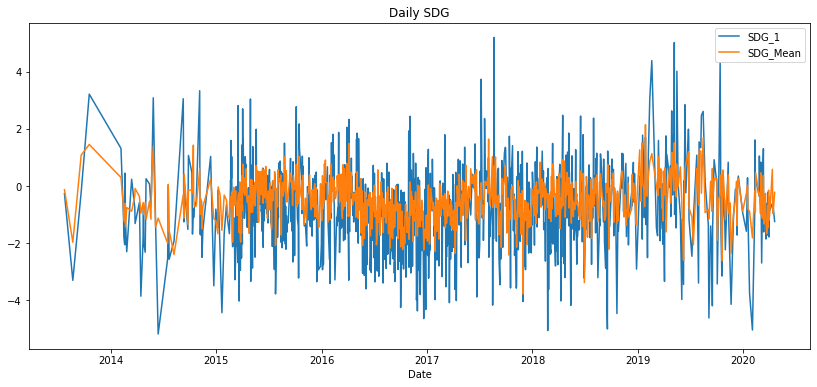

In [34]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily SDG")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=CMCSA_df.loc[:,'SDG_1'], label="SDG_1")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=CMCSA_df.loc[:,'SDG_Mean'], label="SDG_Mean")

# Add label for horizontal axis
plt.xlabel("Date")

### Identifying Trends in Time Series


In [67]:
def plotLabel(label,df):
  label_df = df[df.Ticker.isin([label])]
  label_df = label_df[ ['Timestamp'] + list(label_df.loc[:,'SDG_1':'SDG_Mean']) ]
  label_df['Timestamp'] = pd.to_datetime(label_df['Timestamp'])
  label_df.set_index('Timestamp',inplace = True)
  SDG_1 = label_df[['SDG_1']]
  SDG_2 = label_df[['SDG_2']]
  SDG_3 = label_df[['SDG_3']]
  SDG_4 = label_df[['SDG_4']]
  SDG_Mean = label_df[['SDG_Mean']]
  # SDG_1.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_2.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_3.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_4.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)  
  SDG_Mean.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  sdg_rm = pd.concat([SDG_1.rolling(180).mean(), SDG_2.rolling(180).mean(), SDG_3.rolling(180).mean(), SDG_4.rolling(180).mean(),SDG_Mean.rolling(180).mean()], axis=1)
  sdg_rm.plot(figsize=(10,5), linewidth=5, fontsize=20)
  plt.xlabel('Year', fontsize=20)


In [75]:
def plot2Label(label_1,label_2,df):
  label_1_df = df[df.Ticker.isin([label_1])]
  label_1_df = label_1_df[ ['Timestamp'] + list(label_1_df.loc[:,'SDG_1':'SDG_Mean']) ]
  label_1_df['Timestamp'] = pd.to_datetime(label_1_df['Timestamp'])
  label_1_df.set_index('Timestamp',inplace = True)
  SDG_1 = label_1_df[['SDG_1']]
  SDG_2 = label_1_df[['SDG_2']]
  SDG_3 = label_1_df[['SDG_3']]
  SDG_4 = label_1_df[['SDG_4']]
  SDG_Mean = label_1_df[['SDG_Mean']]
  # SDG_1.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_2.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_3.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_4.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)  
  SDG_Mean.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)

  label_2_df = df[df.Ticker.isin([label_2])]
  label_2_df = label_2_df[ ['Timestamp'] + list(label_2_df.loc[:,'SDG_1':'SDG_Mean']) ]
  label_2_df['Timestamp'] = pd.to_datetime(label_2_df['Timestamp'])
  label_2_df.set_index('Timestamp',inplace = True)
  SDG_2_1 = label_2_df[['SDG_1']]
  SDG_2_2 = label_2_df[['SDG_2']]
  SDG_2_3 = label_2_df[['SDG_3']]
  SDG_2_4 = label_2_df[['SDG_4']]
  SDG_2_Mean = label_2_df[['SDG_Mean']]
  # SDG_1.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_2.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_3.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
  # SDG_4.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)  
  SDG_2_Mean.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)


  sdg_rm = pd.concat([SDG_Mean.rolling(180).mean(),SDG_2_Mean.rolling(180).mean()], axis=1)
  sdg_rm.plot(figsize=(10,5), linewidth=5, fontsize=20)
  plt.xlabel('Year', fontsize=20)
  
 

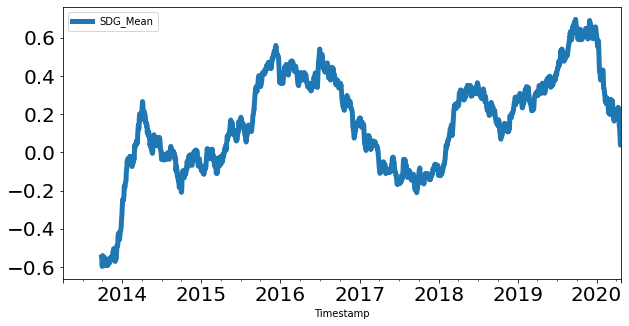

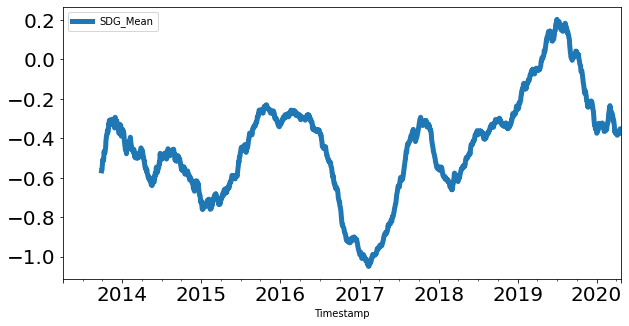

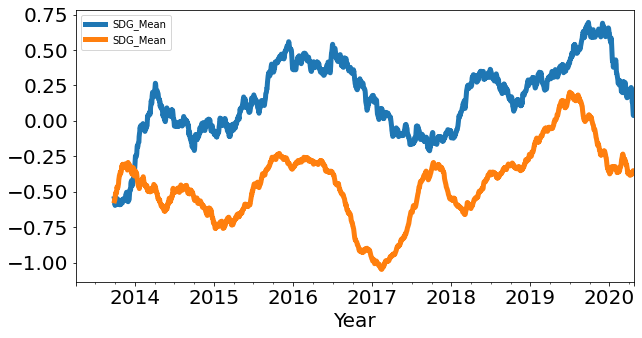

In [76]:
plot2Label('SO','CMCSA',df)

In [70]:
df = df.fillna(0)

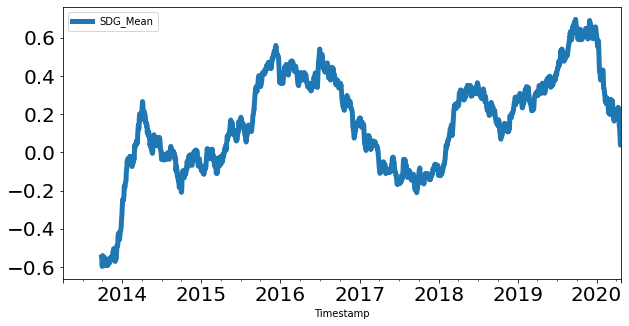

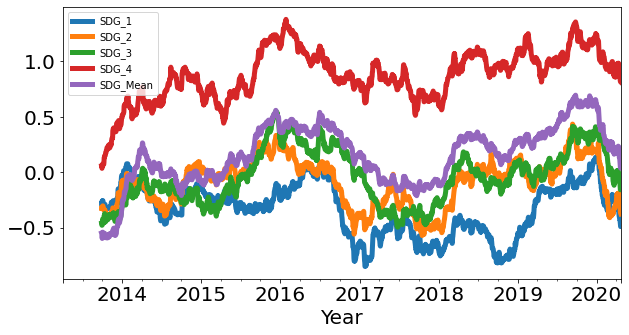

In [69]:
plotLabel('SO',df_fillna)

In [38]:
CMCSA = df_fillna[df_fillna.Ticker.isin(['CMCSA'])]

In [39]:
CMCSA = CMCSA[ ['Timestamp'] + list(CMCSA.loc[:,'SDG_1':'SDG_Mean']) ]


In [40]:
CMCSA['Timestamp'] = pd.to_datetime(CMCSA['Timestamp'])
CMCSA.set_index('Timestamp',inplace = True)

In [56]:
SDG_1 = CMCSA[['SDG_1']]
SDG_2 = CMCSA[['SDG_2']]
SDG_3 = CMCSA[['SDG_3']]
SDG_4 = CMCSA[['SDG_4']]
SDG_Mean = CMCSA[['SDG_Mean']]

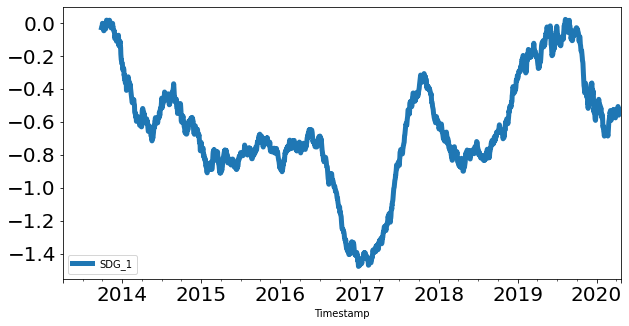

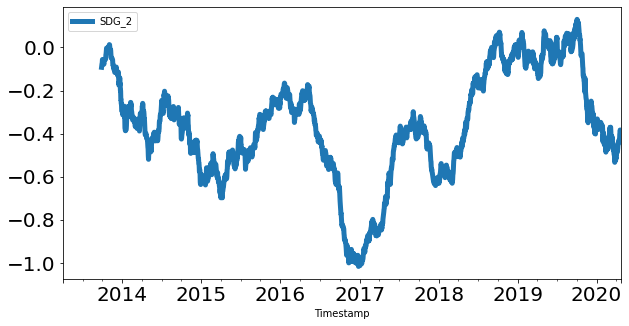

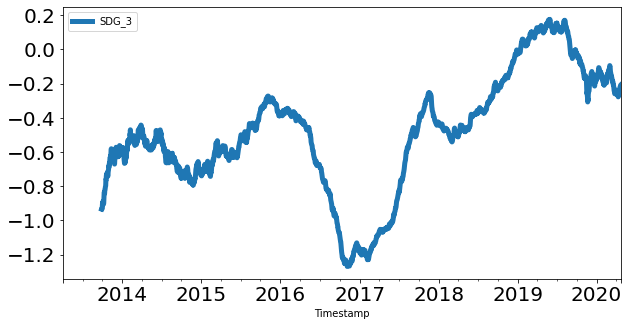

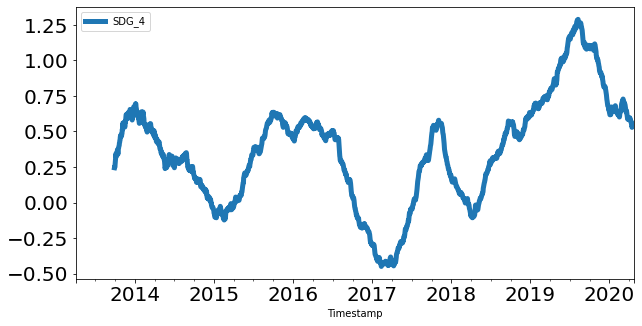

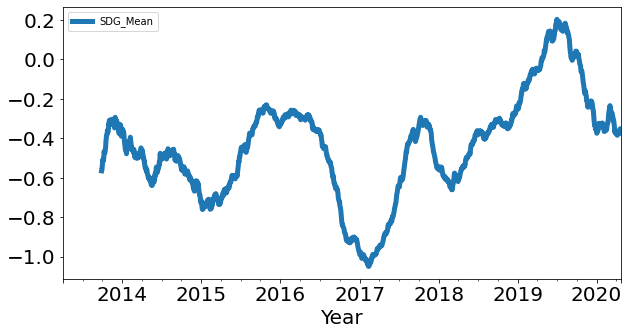

In [57]:
SDG_1.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
SDG_2.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
SDG_3.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
SDG_4.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
SDG_Mean.rolling(180).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)

plt.xlabel('Year', fontsize=20);

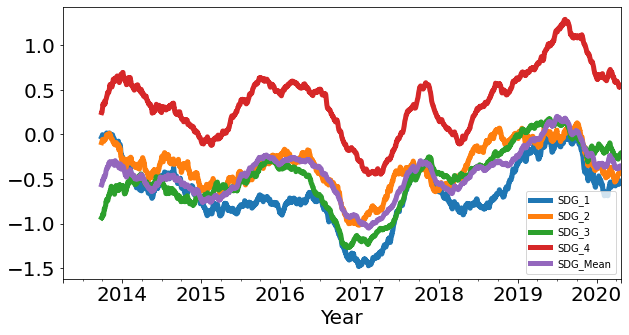

In [60]:
sdg_rm = pd.concat([SDG_1.rolling(180).mean(), SDG_2.rolling(180).mean(), SDG_3.rolling(180).mean(), SDG_4.rolling(180).mean(),SDG_Mean.rolling(180).mean()], axis=1)
sdg_rm.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Forecasting

In [77]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

There are 11 categories and 622 companies in the data, we start from time series analysis and forecasting for CMCSA SDG values. We are using CMCSA data first. 

In [78]:
CMCSA.head()
#SDG_1 = CMCSA[['SDG_1']]


,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,SDG_Mean
Timestamp,,,,,,,,,,,,,,,,,,
2013-04-01,-0.869565,-1.679104,-0.869565,0.000000,-0.869565,0.0,0.0,-1.866764,-6.476684,-0.869565,-1.965710,-0.874126,0.000000,0.000000,0.000000,-0.304031,-1.157792,-1.618407
2013-04-02,0.000000,-1.694915,0.206608,0.250963,0.000000,0.0,0.0,0.250963,-3.238469,1.938880,-2.209433,-0.873362,0.000000,0.000000,0.000000,-1.875416,0.000000,-0.804909
2013-04-03,-1.117213,-1.117213,-1.339286,-2.968493,-7.819549,0.0,0.0,-2.254478,-1.267924,-6.208625,-3.272216,0.000000,-0.895141,0.000000,-0.895141,-3.764650,0.000000,-2.743327
2013-04-04,0.000000,0.000000,-2.251656,-1.481481,0.000000,0.0,0.0,-2.251656,-2.251656,-2.251656,-1.481481,-2.251656,0.000000,0.000000,0.000000,-1.866569,0.000000,-2.010976
2013-04-05,0.000000,0.000000,-0.988142,0.554785,0.000000,0.0,0.0,0.349240,0.000000,-2.389937,-0.567127,-1.273885,0.000000,0.554785,0.000000,-1.689040,0.000000,-0.681165


In [80]:
CMCSA.min(), CMCSA.max()

(SDG_1       -8.593750
 SDG_2      -11.904762
 SDG_3      -10.491071
 SDG_4       -6.389158
 SDG_5      -12.285012
 SDG_6       -8.414239
 SDG_7       -7.888631
 SDG_8       -6.239168
 SDG_9      -10.491071
 SDG_10      -6.361287
 SDG_11     -10.491071
 SDG_12      -7.250755
 SDG_13      -8.354974
 SDG_14      -7.816092
 SDG_15      -8.032129
 SDG_16      -6.730769
 SDG_17     -11.111111
 SDG_Mean    -6.541125
 dtype: float64, SDG_1        9.932141
 SDG_2        9.486931
 SDG_3        7.624633
 SDG_4        7.624633
 SDG_5        8.545727
 SDG_6        9.433962
 SDG_7       11.160059
 SDG_8        4.696323
 SDG_9        5.524895
 SDG_10       5.836901
 SDG_11       7.624633
 SDG_12       7.666589
 SDG_13       6.770833
 SDG_14       7.099391
 SDG_15       6.770833
 SDG_16       4.638575
 SDG_17       7.142857
 SDG_Mean     3.139965
 dtype: float64)

In [81]:
CMCSA.index

DatetimeIndex(['2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04',
               '2013-04-05', '2013-04-06', '2013-04-07', '2013-04-08',
               '2013-04-09', '2013-04-10',
               ...
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22'],
              dtype='datetime64[ns]', name='Timestamp', length=2579, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [82]:
y = CMCSA['SDG_Mean'].resample('MS').mean()

Have a quick peek 2017 CMCSA data.

In [84]:
y['2017':]

Timestamp
2017-01-01   -0.987681
2017-02-01   -0.769780
2017-03-01   -0.765958
2017-04-01   -0.900699
2017-05-01   -0.342945
2017-06-01   -0.097991
2017-07-01   -0.231265
2017-08-01   -0.008556
2017-09-01   -0.625282
2017-10-01   -0.639214
2017-11-01   -0.796401
2017-12-01   -1.027454
2018-01-01   -0.384128
2018-02-01   -0.393645
2018-03-01   -0.370422
2018-04-01   -0.217707
2018-05-01   -0.274556
2018-06-01   -0.661042
2018-07-01   -0.487474
2018-08-01   -0.074090
2018-09-01   -0.150305
2018-10-01   -0.302395
2018-11-01   -0.331920
2018-12-01   -0.121101
2019-01-01    0.225133
2019-02-01    0.197004
2019-03-01    0.040340
2019-04-01    0.086304
2019-05-01    0.393942
2019-06-01    0.188335
2019-07-01   -0.043175
2019-08-01   -0.273871
2019-09-01   -0.148410
2019-10-01   -0.585535
2019-11-01   -0.615640
2019-12-01   -0.460802
2020-01-01    0.147938
2020-02-01    0.049284
2020-03-01   -0.768231
2020-04-01   -0.488458
Freq: MS, Name: SDG_Mean, dtype: float64

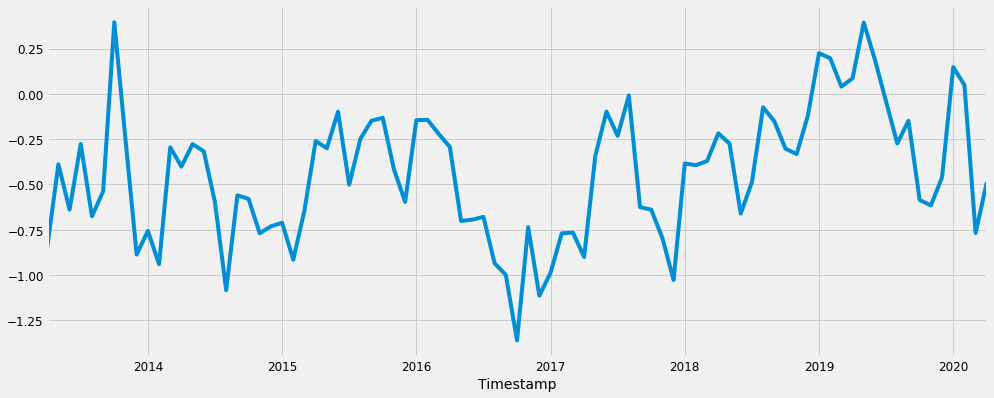

In [85]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and at the end of the year. There is always an upward trend with a peak within any single year with a couple of low to mid months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

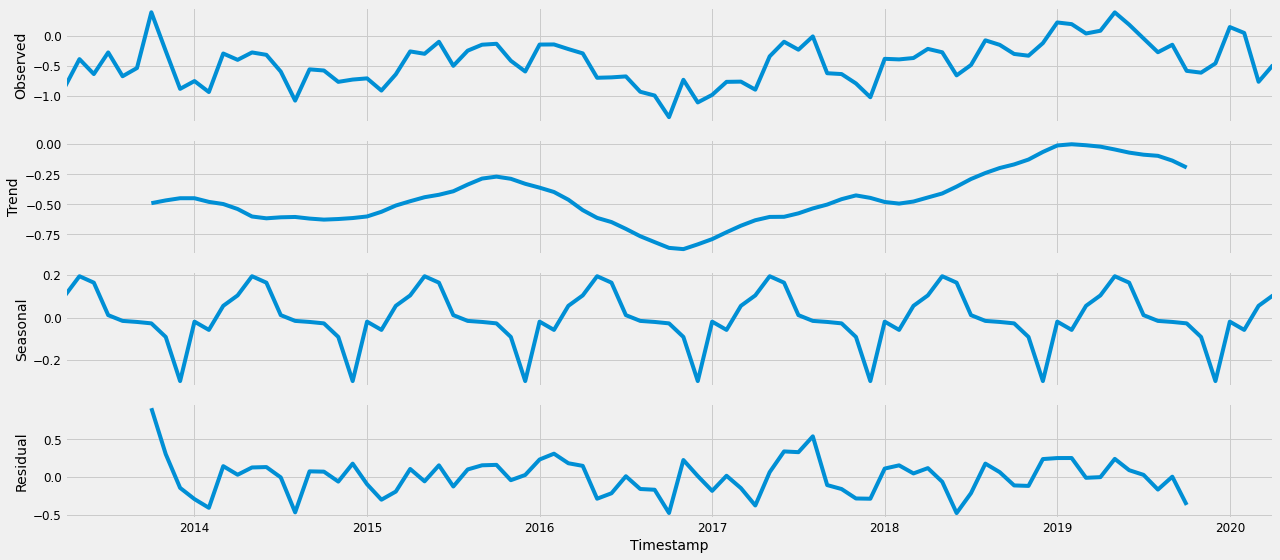

In [86]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA

We are going to apply time-series forecasting, ARIMA, which stands for Autoregressive Integrated Moving Average.
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [87]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our SDGs ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [92]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:144.42681634946746
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:113.42403603091886
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:107.81003034288581
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:74.00049399723267
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:91.39813399209446
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:76.37937953747064
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:77.90275732295017
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:74.88046135063361
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:86.77864387832227
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:66.53910428995476
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:79.74360895976228
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:48.99781111721822
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:56.17362172866679
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:49.43790832503807
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:52.943865349789185
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:47.839589990681525
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:48.959398234401675
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:29.84312042751626
ARIM

The above output suggests that ARIMA(1, 0, 0)x(1, 0, 0, 12)12 yields the lowest AIC value of 297.78. AIC:25.12960273057421

Fitting the ARIMA model

In [93]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8472      0.061     13.989      0.000       0.729       0.966
ar.S.L12       0.1432      0.129      1.111      0.267      -0.110       0.396
sigma2         0.0764      0.013      5.694      0.000       0.050       0.103


We should always run model diagnostics to investigate any unusual behavior.

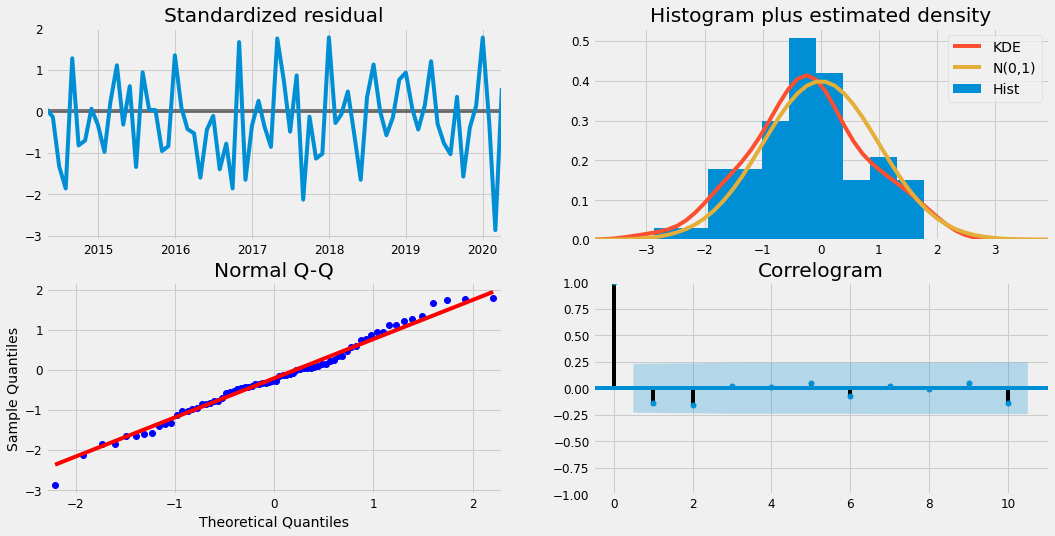

In [94]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

### Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

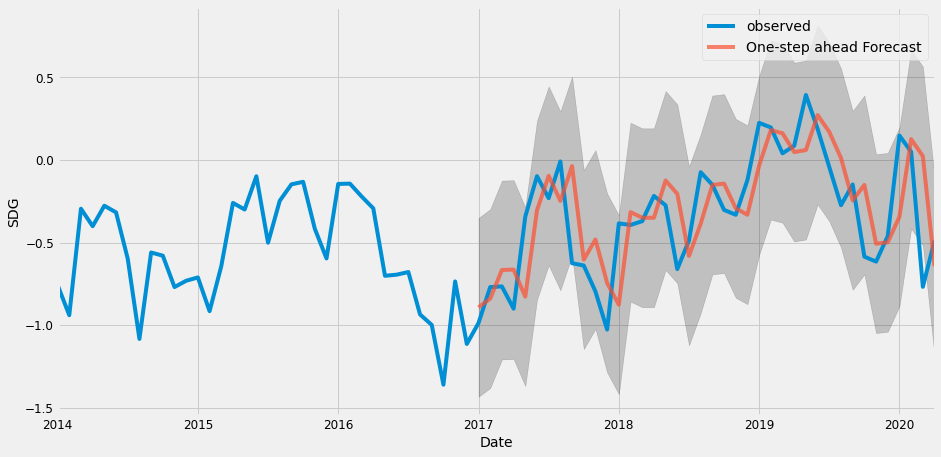

In [97]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('SDG')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

The Mean Squared Error of our forecasts is 0.08

In [98]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.08


### Producing and visualizing forecasts

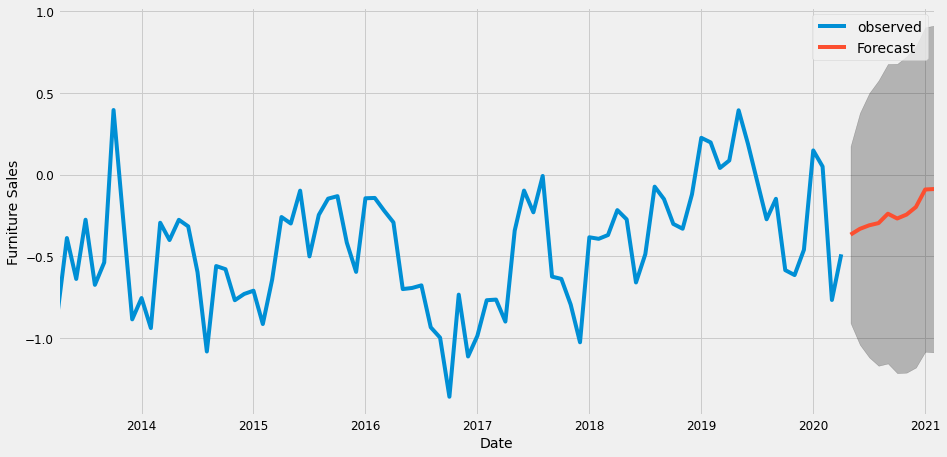

In [103]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model captured sort of seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.
The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other over time.